**Importing the modules(or libraries**)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import copy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

**Importing Dataset**

In [ ]:
wine=pd.read_csv('winequality-red.csv')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Shape of the Dataset**

In [ ]:
print(wine.shape)                     # Shape of the Dataset

(1599, 12)


**For finding the information of columns of dataset**

In [ ]:
wine.describe()                       #For finding the information of columns of dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**To check the type and nullity of the columns**

In [ ]:
wine.info()                             #To check the type and nullity of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**To find the numbers of null elements in the columns**

In [ ]:
wine.isnull().sum()                    

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**To find the correlation between the columns**

In [ ]:
wine.corr()                            

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**To draw the graph for quantity of 'Quality'**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


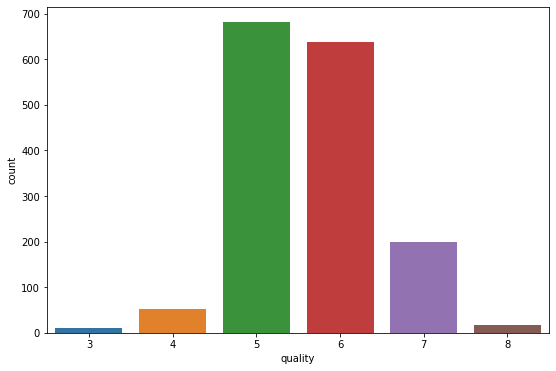

In [ ]:
plt.figure(figsize = (9,6))
sns.countplot(wine['quality'])                    

**To find the quantity of "Quality"**

In [ ]:
wine['quality'].value_counts()       
           

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**To draw the heatmap(finding relation)**

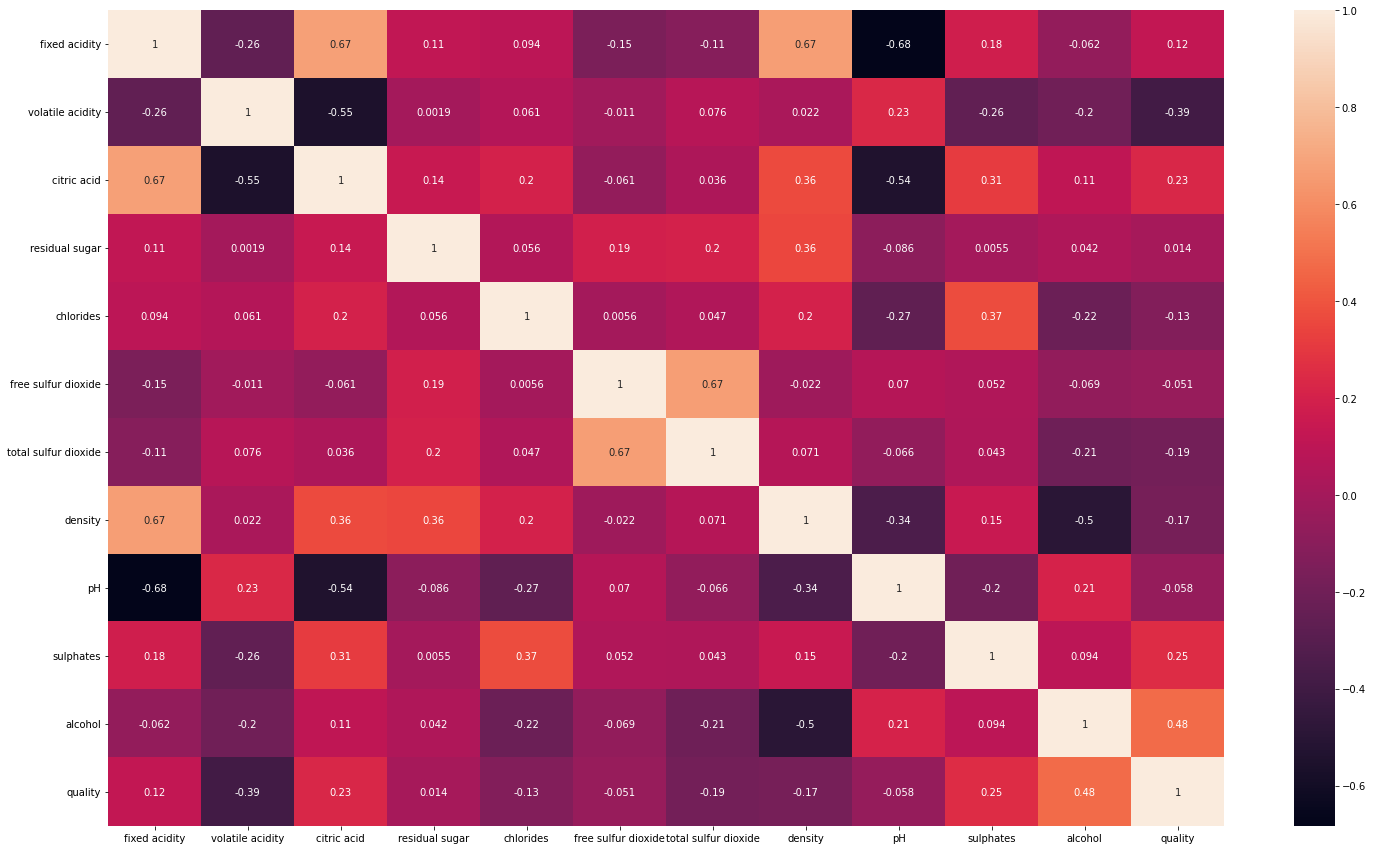

In [ ]:
corr = wine.corr()
plt.figure(figsize = (25,15))
sns.heatmap(corr,annot=True)                   
plt.show()

**To arrange the relations in descending order**

In [ ]:
corr=wine.corr()['quality'].sort_values(ascending=False)
print(corr)                                                  

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


**To draw the pairplot**

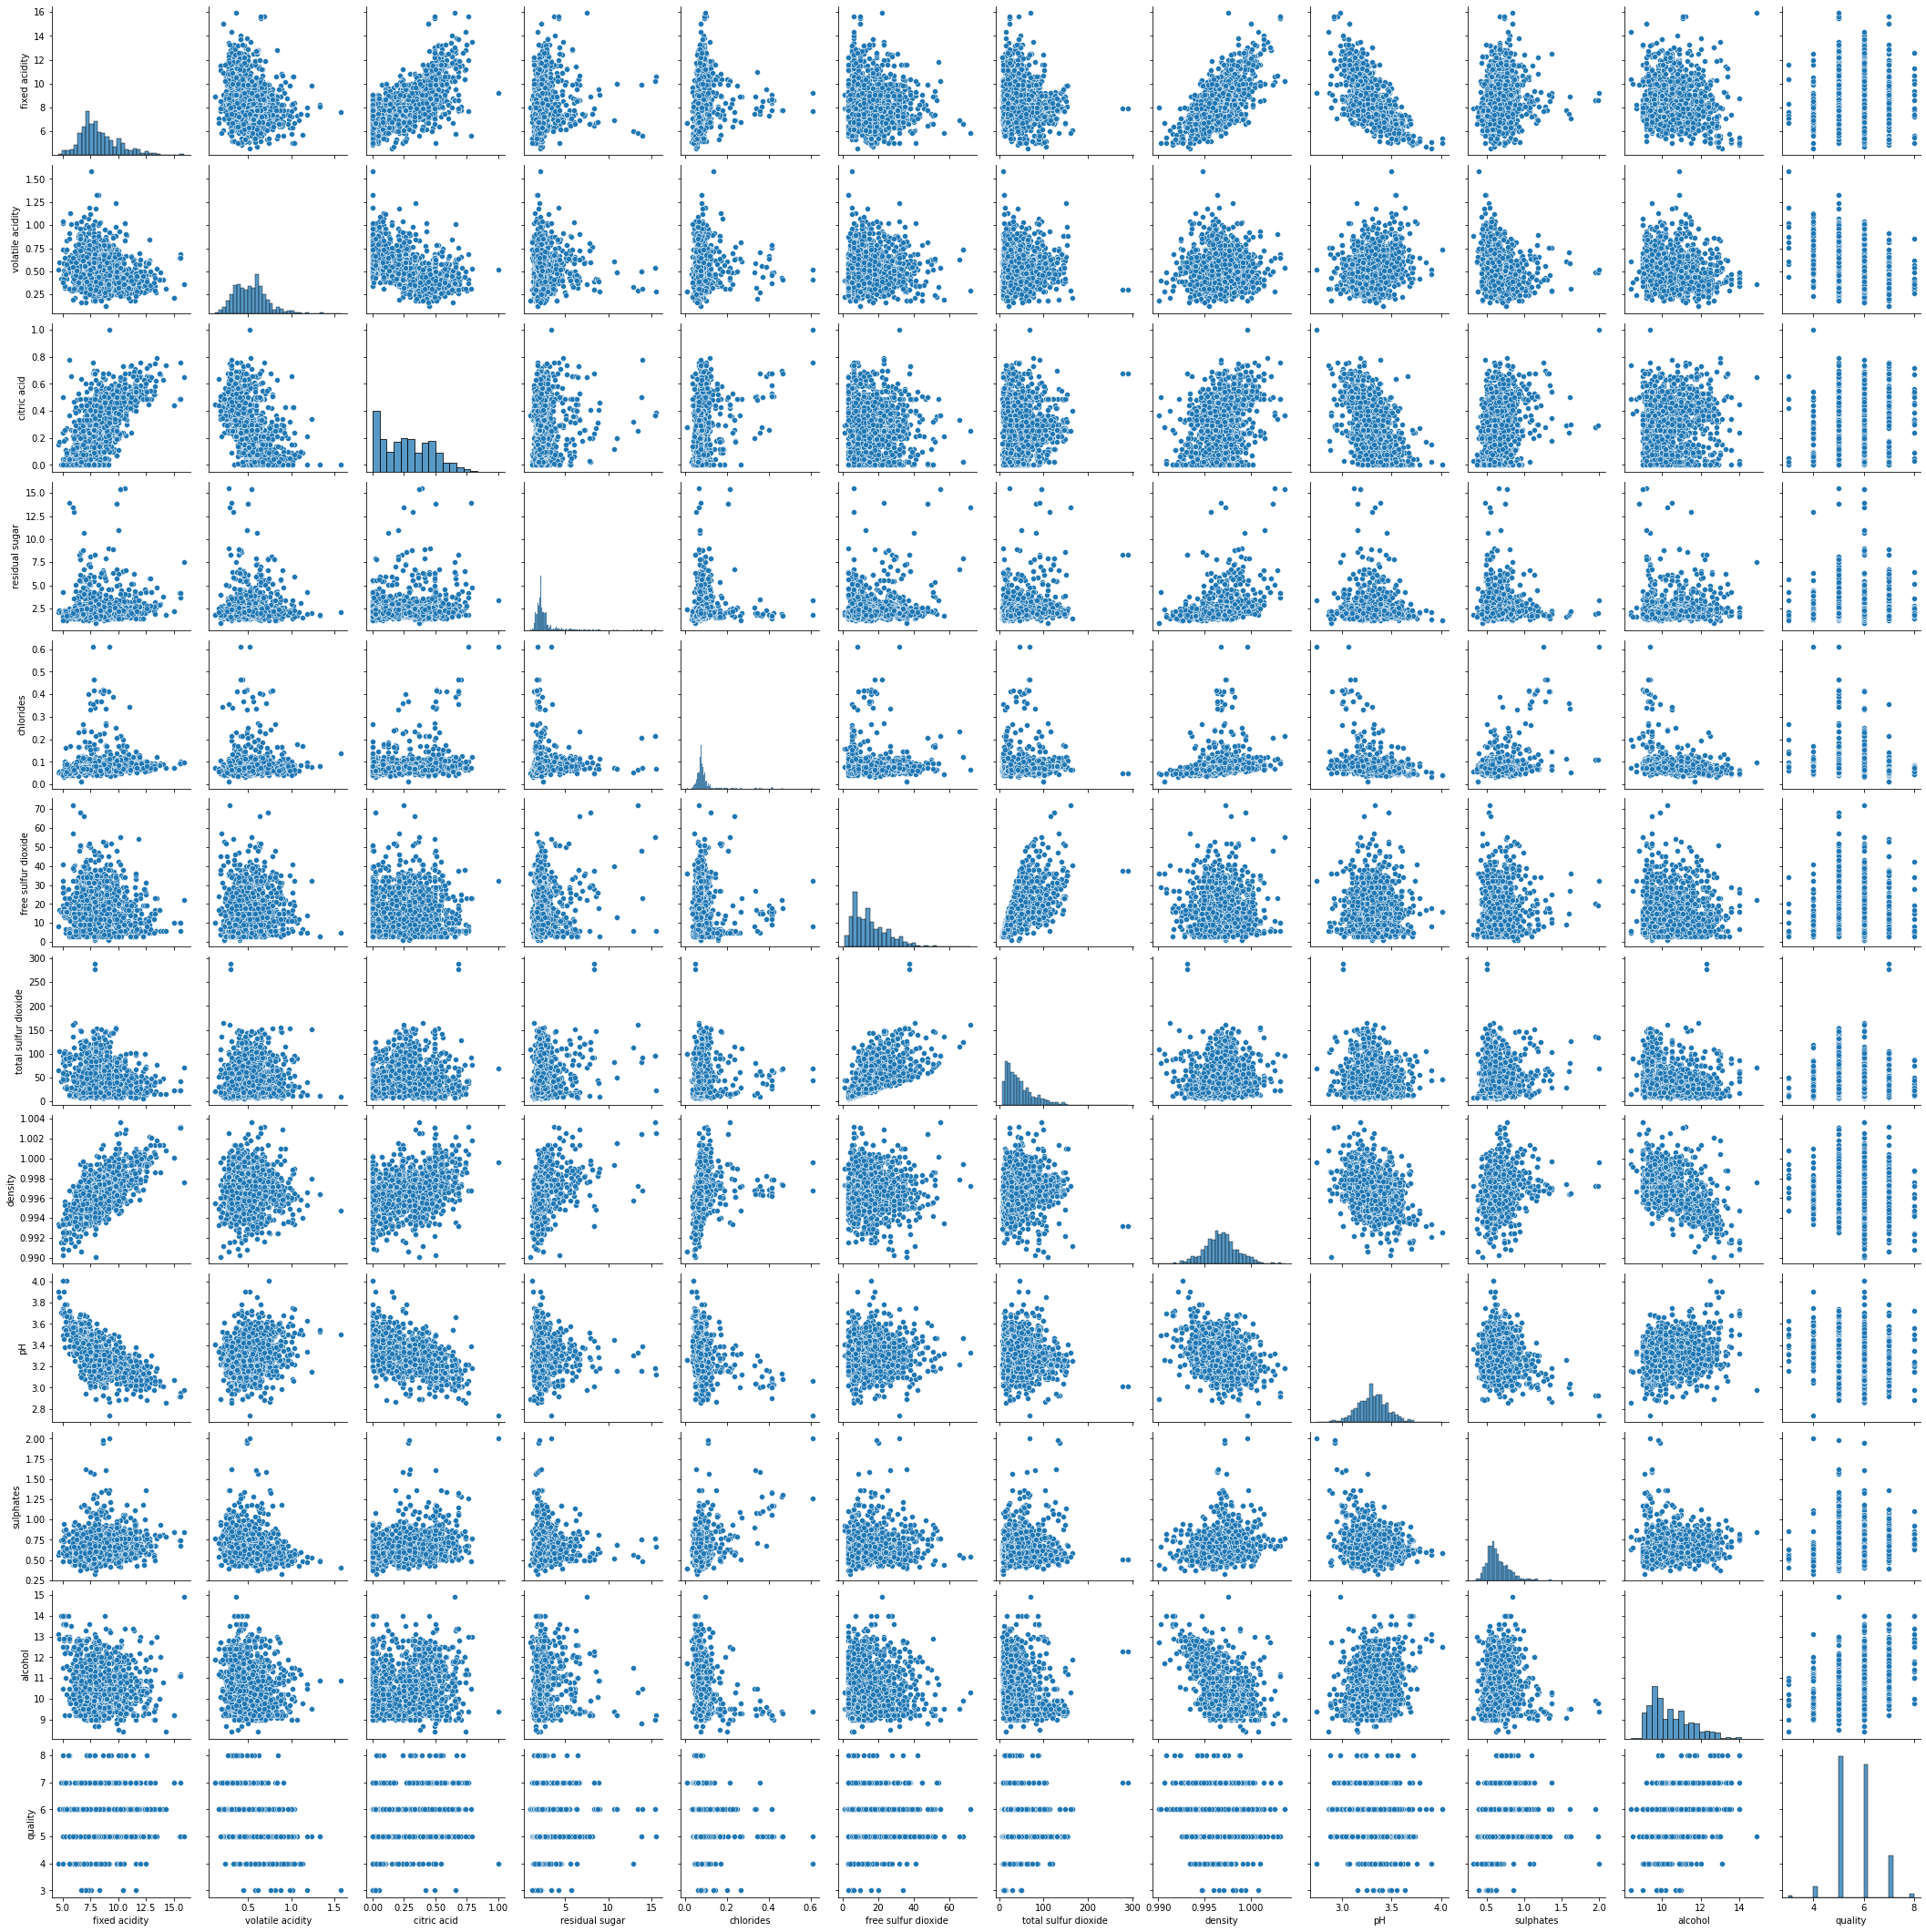

In [ ]:
sns.pairplot(wine)                                         

**To draw the histograms**

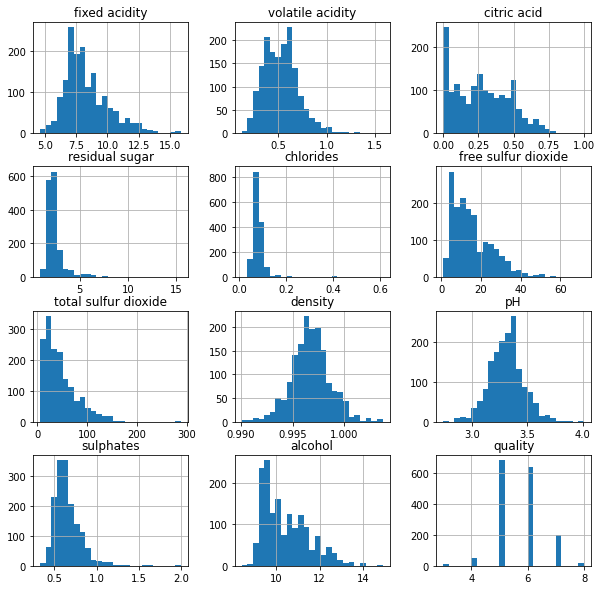

In [ ]:
wine.hist(bins=25,figsize=(10,10))
plt.show()                                             

**To draw boxplot between "Alcohol" and "Quality"**

Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')

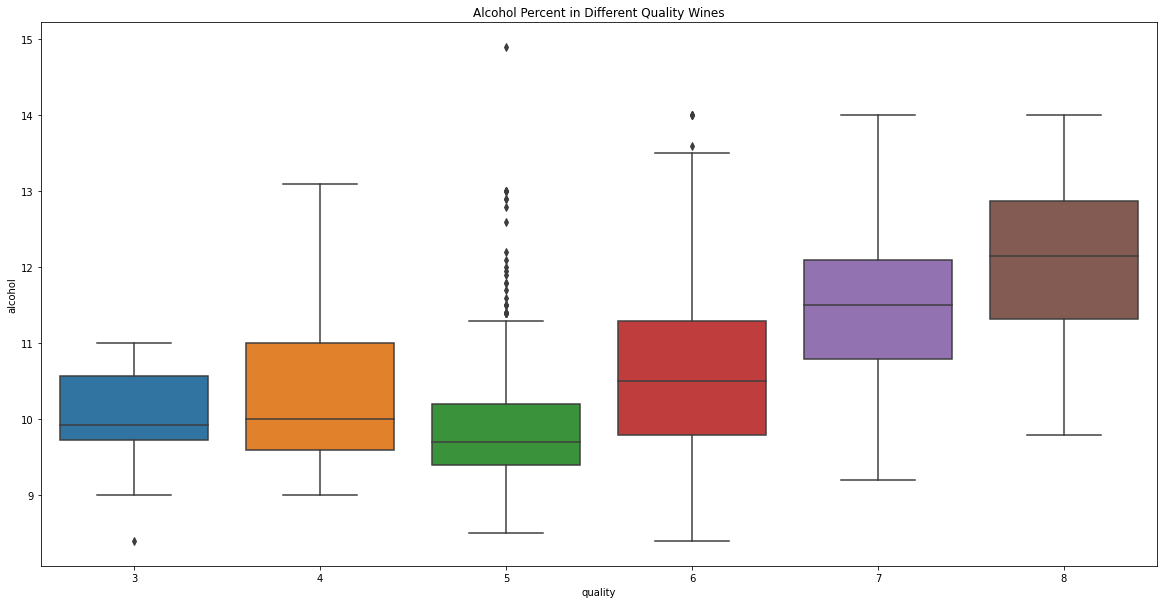

In [ ]:
plt.figure(figsize=(20,10)) 
sns.boxplot(x="quality",y="alcohol", data=wine)               
plt.title("Alcohol Percent in Different Quality Wines")

***GRADIENT DESCENT IN MULTIPLE LINEAR REGRESSION***

---



---





**SPLITTING THE DATA INTO TEST AND TRAIN DATA**


In [ ]:
train_set,test_set=train_test_split(wine,test_size=0.2,random_state=42)

In [ ]:
X=train_set.iloc[:,:11]           #EXTRACT ALL COLUMNS EXCEPT  QUALITY
x=X.values
y=train_set.iloc[:,11:12]          #EXTRACT QUALITY COLUMN
y=y.values
x.shape                           #shape of train set


(1279, 11)

**INTIALIZE THE VALUES OF PARAMETERS RANDOMLY**

In [ ]:
b_init = 5
w_init = np.array([ 0.39, 18.23, 0.32, -26.4,21.32,0.34,0.12,1.32,0.34,12.4,0.02])

**FUNCTION FOR PREDICTION THE VALUE OF QUALITY**

In [ ]:
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p.round()

**FUNCTION FOR FINDING THE VALUE OF COST(ERROR)**

In [ ]:
def compute_cost(X, y, w, b): 

    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2      
    cost = cost / (2 * m)                      
    return cost

**FINDING THE COST AT INITIAL PARAMETERS**

In [ ]:
cost = compute_cost(x, y, w_init, b_init)
print("Cost at optimal w :", cost)  


Cost at optimal w : [1189.71737148]


In [ ]:
def compute_gradient(X, y, w, b): 
    
    m,n = X.shape                # m=1279,n=11
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

**FUNCTION FOR FINDING THE GRADIENT DESCENT**

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha,num_iters): 
    
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
        
    return w, b #return final w,b 

**TRY TO FINDING THE VALUES OF FINAL PARAMETERS USING GRADIENT DESCENT**

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.0
# some gradient descent settings
iterations = 2000
alpha =0.00005
# run gradient descent 
w_final, b_final  = gradient_descent(x, y, initial_w, initial_b,compute_cost, compute_gradient,alpha, iterations) 
print("b,w found by gradient descent: ",b_final,w_final)

b,w found by gradient descent:  [0.02827524] [ 0.21133875  0.01179653  0.00673393  0.04601505  0.00208869  0.01613671
 -0.00400898  0.02814027  0.09510335  0.02015293  0.31292623]


**VALUE OF COST AT FINAL PARAMETERS**


In [ ]:
cost = compute_cost(x, y, w_final, b_final)
print("Cost at Final value :", cost) 

Cost at Final value : [0.27732879]


In [ ]:
Xte=test_set.iloc[:,:11]
xte=Xte.values
yte=test_set.iloc[:,11:12]
yte=yte.values

**PREDICT THE VALUE OF QUALITY**

In [ ]:
yp=[]
m=xte.shape[0]
for i in range(m):
  yp.append(predict(xte[i], w_final, b_final))
  


**GRAPH BETWEEN PREDICTED AND REAL VALUES OF QUALITY**

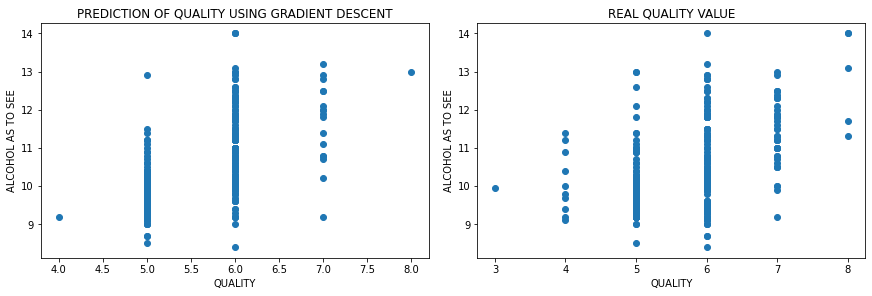

In [ ]:
xa=test_set.iloc[:,10:11].values         #Extracting the value of alcohol, only to make graph(or show Y-Axis)      

# plt.scatter(xq,y)
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.scatter(yp,xa)
ax1.set_title("PREDICTION OF QUALITY USING GRADIENT DESCENT")
ax1.set_xlabel("QUALITY")
ax1.set_ylabel("ALCOHOL AS TO SEE")
ax2.scatter(yte,xa)
ax2.set_title("REAL QUALITY VALUE")
ax2.set_xlabel("QUALITY")
ax2.set_ylabel("ALCOHOL AS TO SEE")
plt.show()  

**NUMBER OF VALUES OF PREDICTED QUALITIES**

In [ ]:
for i in range(3,10):
  print("THE NUMBER OF PREDICTION OF QUALITY",i,"IS:",yp.count(i))

THE NUMBER OF PREDICTION OF QUALITY 3 IS: 0
THE NUMBER OF PREDICTION OF QUALITY 4 IS: 1
THE NUMBER OF PREDICTION OF QUALITY 5 IS: 156
THE NUMBER OF PREDICTION OF QUALITY 6 IS: 145
THE NUMBER OF PREDICTION OF QUALITY 7 IS: 17
THE NUMBER OF PREDICTION OF QUALITY 8 IS: 1
THE NUMBER OF PREDICTION OF QUALITY 9 IS: 0


**NUMBER OF VALUES OF REAL QUALITIES**

In [ ]:
a=list(y)
for i in range(3,10):
  print("THE REAL NUMBER OF QUALITY",i,"IS:",a.count(i))

THE REAL NUMBER OF QUALITY 3 IS: 9
THE REAL NUMBER OF QUALITY 4 IS: 43
THE REAL NUMBER OF QUALITY 5 IS: 551
THE REAL NUMBER OF QUALITY 6 IS: 506
THE REAL NUMBER OF QUALITY 7 IS: 157
THE REAL NUMBER OF QUALITY 8 IS: 13
THE REAL NUMBER OF QUALITY 9 IS: 0


**FINDING THE MEAN SQAURED ERROR**

In [ ]:
print("MEAN SQUARED ERROR IS",mean_squared_error(yte,yp))

MEAN SQUARED ERROR IS 0.65


**ACCURCY OF THE MODEL**

In [ ]:
test_data_accuracy=accuracy_score(yp,yte)
print("Accuracy:",test_data_accuracy)

Accuracy: 0.525


***RANDOM FOREST***

---



---



**Splitting the "Quality" into three values i.e. 0(for bad quality), 1(for average quality) and 2(for best quality)**

In [ ]:
def fun(y_value):
  
    if y_value==6:
        return 1
  
    elif y_value>= 7:
        return 2
  
    else:
        return 0
a=wine['quality'].apply(fun)


**Retrieve all columns except "Quality"**

In [ ]:
u=wine.iloc[:,:11]

**Splitting the data into test and train data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(u,a,test_size=0.2,random_state=2)   
#test_size=0.2 means 20% convert into test data

**Applying the Random Forest algorithm**

In [ ]:
model= RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

**Making the model**

In [ ]:
y_test_prediction=model.predict(x_test)

**Accuracy of the model**

In [ ]:
test_data_accuracy=accuracy_score(y_test_prediction,y_test)
print("Accuracy:",test_data_accuracy)

Accuracy: 0.703125


**Making the random prediction**

In [ ]:
input_data=(7.3,	0.65,	0.00	,1.2,	0.065,	15.0,	21.0	,0.9946	,3.39	,0.47,10.0)
arr= np.asarray(input_data).reshape(1,-1)
prediction=model.predict(arr)
print(prediction)
if prediction[0]==0:
  print("Bad Quality")
elif prediction[0] ==1:
  print("Avarage Quality")
else:
  print("Best Quality")  

[2]
Best Quality


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Since, the accuracy for Random Forest is more than Gradient Descent in Multiple Linear Regression. So, Random Forest is more accurate in finding the QUALITY of Red Wine.